# Code examples

**Authors:** Isidora Jankov, Anđelka Kovačević & Viktor Radović  
**Last updated:** 06.05.2021.

Here, we give instructive examples for code usage. We will demonstrate how to generate an artificial light curve with custom cadence and cadence obtained from LSST OpSims, calculation and plotting of the light curve structure function and usage of our function `LC_SF_viz` for doing it all together.

In [1]:
# Import standard libraries
import numpy as np
import matplotlib.pyplot as plt

# Import library with our functions
import functions 

In [2]:
%matplotlib inline

### Generating a single continuous artificial light curve

In [3]:
np.random.seed(0)
long=10*365 # survey duration in days
deltatc=1. # cadence

We can generate a continuous light curve based on the procedure described in Kovačević et al. (2021, submitted to MNRAS). The light curve is simulated using a stochastic model based on the Damped random walk (DRW) proccess, where model parameters are infered from physical quantities such are supermassive black hole mass and/or AGN luminosity.

You can change the keyword arguments and model the light curve to your liking (change redshift, turn on/off the oscillations, change cadence, etc.). See documentation in [functions.py](./functions.py)  for more details about function arguments.

In [4]:
tt, yy = functions.LC_conti(long, deltatc=1, oscillations=True, A=0.14, noise=0.00005, z=0, frame='observed')

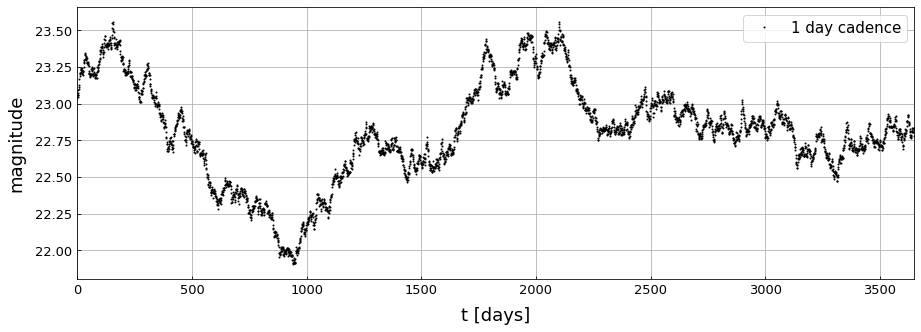

In [5]:
# Plotting the obtained light curve
functions.LC_plot(tt,yy,long)

### Creating gappy artificial light curves

We can easily change cadences of our continuous light curve using `var_cad` function. Cadence is set to be zero for all months by default. Zero cadence means no observation, so we can use this function to obtain gappy light curves.

In [6]:
# Cadence of 1 day during 3 months in each year (May, June, July). No observations in the remaining months. 
cad3m1_tt, cad3m1_yy = functions.var_cad(tt, yy, m5=1, m6=1, m7=1)

# Cadence of 4 days during 5 months in each year (August, September, October, November, December).
cad5m4_tt, cad5m4_yy = functions.var_cad(tt, yy, m8=4, m9=4, m10=4, m11=4, m12=4)

# Cadence of 10 days during first and third quarter of each year.
cad6m10_tt, cad6m10_yy = functions.var_cad(tt, yy, m1=10, m2=10, m3=10, m7=10, m8=10, m9=10)

In [7]:
ts = [tt, cad3m1_tt, cad5m4_tt, cad6m10_tt]
ys = [yy, cad3m1_yy, cad5m4_yy, cad6m10_yy]
labels = ['Continuous LC','3 months/1 day cadence', '5 months/4 day cadence', 'Q1,Q3/10 day cadence']

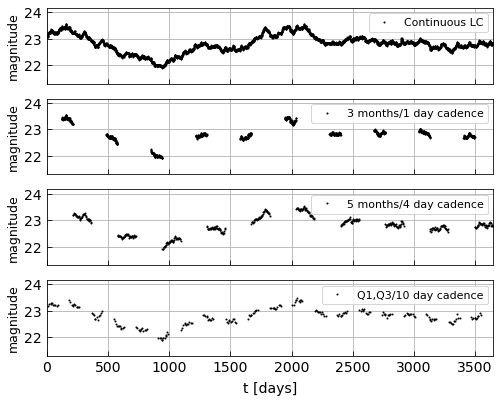

In [8]:
fig = plt.figure(figsize=(8,6.4))
custom_xlim = (0, long)
custom_ylim = (yy.min()-0.6, yy.max()+0.6)
i = 1
for t,y,l in zip(ts, ys, labels):
    ax = fig.add_subplot(len(ts),1,i)
    ax.plot(t, y, 'ko', markersize = 1, label=l)
    
    if i == len(ts):
        ax.set_xlabel('t [days]', fontsize=14, labelpad=7)
    else:
        plt.setp(ax.get_xticklabels(), visible=False)

    ax.set_ylabel('magnitude', fontsize = 12.5)
    ax.tick_params(axis='both', which='major', labelsize=14, direction='in', length = 5, pad = 5)
    plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    ax.legend(fontsize=11, loc='upper right')
    ax.grid(True)
    i = i+1

### Creating artificial light curves with variable cadences

In [9]:
# Variable cadence (for each year): 6 months/30 day cadence, 3 months/1 day cadence & 3 months no observation.
cadvar_tt, cadvar_yy = functions.var_cad(tt, yy, m1=30, m5=1, m6=1, m7=1, m8=30, m9=30, m10=30, m11=30, m12=30)

In [10]:
ts = [tt, cadvar_tt]
ys = [yy, cadvar_yy]
labels = ['1 day cadence','variable cadence']

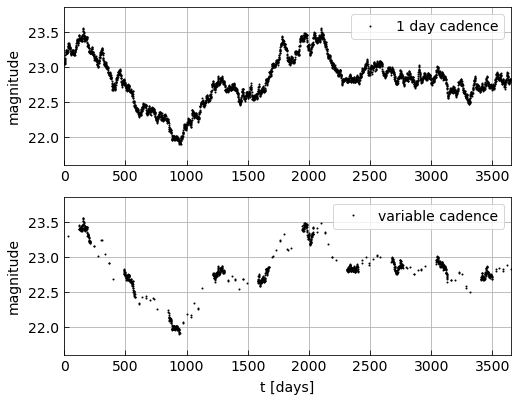

In [11]:
fig = plt.figure(figsize=(8,6.4))
custom_xlim = (0, long)
custom_ylim = (yy.min()-0.3, yy.max()+0.3)
i = 1
for t,y,l in zip(ts,ys, labels):
    ax = fig.add_subplot(len(ts),1,i)
    ax.plot(t,y, 'ko', markersize = 1, label=l)
    
    if i == len(ts):
        ax.set_xlabel('t [days]', fontsize=14, labelpad=7)
    else:
        plt.setp(ax.get_xticklabels(), visible=True)

    ax.set_ylabel('magnitude', fontsize = 14, labelpad=7)
    ax.tick_params(axis='both', which='major', labelsize=14, direction='in', length = 5, pad = 5)
    plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
    ax.legend(fontsize=14)
    ax.grid(True)
    i = i+1

### Structure functions

Let's calculate and plot structure functions for previously generated light curves.

In [12]:
ts = [tt,  cad3m1_tt, cad5m4_tt, cad6m10_tt]
ys = [yy,  cad3m1_yy, cad5m4_yy, cad6m10_yy]
labels = ['Continuous LC','3 months/1 day cadence', '5 months/4 day cadence', 'Q1,Q3/10 day cadence']

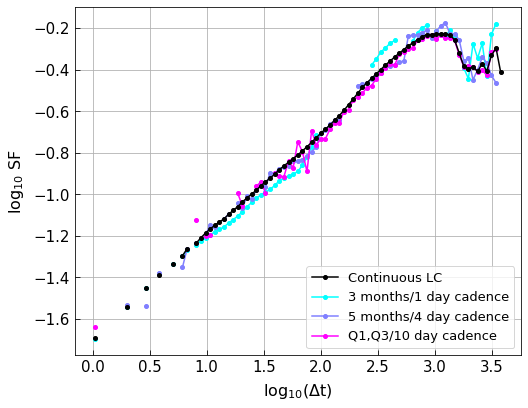

In [13]:
fig = plt.figure(figsize=(8,6.4))

ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$\log_{10}(\Delta \mathrm{t})$', fontsize = 16, labelpad=7)
ax1.set_ylabel(r'$\log_{10} \ \mathrm{SF}$', fontsize = 16, labelpad=7)

color=iter(plt.cm.cool(np.linspace(0,1,3)))
for t, y, l in zip(ts, ys, labels):
    s, edge = functions.sf(t, y, z=0)
    if l=="Continuous LC":
        ax1.plot(np.log10(edge[:-1]+np.diff(edge)/2), np.log10(np.sqrt(s)), 'ko-',linewidth=1.5, markersize=4,label=l, zorder=3)
    else:
        c=next(color)
        ax1.plot(np.log10(edge[:-1]+np.diff(edge)/2), np.log10(np.sqrt(s)), c=c, linewidth=1.5, marker='o', markersize=4, label=l)
        

ax1.tick_params(axis='both', which='major', labelsize=15, direction='in', length = 5, pad = 5)
ax1.legend(fontsize=13, loc='lower right')
ax1.grid(True)


### OpSim light curves

We can also use our continuous artificial light curve to generate hypothetical OpSim light curves. The continuous light curve is used for magnitude sampling on survey days when OpSim strategy dictates a visit to particular area of the sky in some filter.

First, we need to import OpSim visits that are stored as MJD. Here, we give an example of OpSim realization for fixed coordinates in the sky in r filter. For instructions on how to get input data with custom constraints from OpSim, see [cadences](./cadences.ipynb) and [cadences_ipywidgets](./cadences_ipywidgets.ipynb) notebooks.

In [14]:
mjd1=np.loadtxt('agn_dat/agn_r_ra_0.0_de_-30.0.dat')
mjd1=np.sort(mjd1)

We will generate a new continuous light curve using `LC_conti` and use it for evaluation of magnitudes for each survey day provided by OpSim realization using `LC_opsim` function.

In [15]:
long = 3650 # duration of the survey
tt, yy = functions.LC_conti(long)
top, yop = functions.LC_opsim(mjd1, tt, yy)

In [16]:
ts = [tt, top]
ys = [yy, yop]
labels = ['1 day cadence','AGN_r_OpSim']

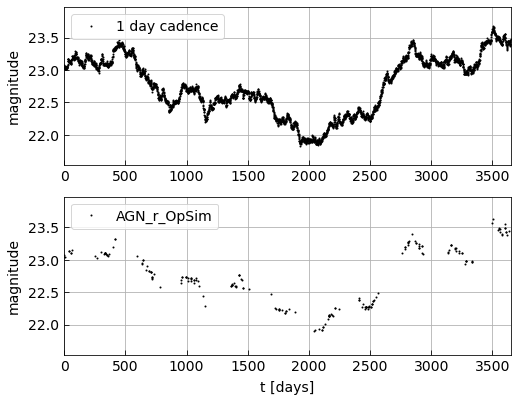

In [17]:
fig = plt.figure(figsize=(8,6.4))
custom_xlim = (0, long)
custom_ylim = (yy.min()-0.3, yy.max()+0.3)
i = 1
for t,y,l in zip(ts,ys, labels):
    ax = fig.add_subplot(len(ts),1,i)
    ax.plot(t,y, 'ko', markersize = 1, label=l)
    
    if i == len(ts):
        ax.set_xlabel('t [days]', fontsize=14, labelpad=7)
    else:
        plt.setp(ax.get_xticklabels(), visible=True)

    ax.set_ylabel('magnitude', fontsize = 14, labelpad=7)
    ax.tick_params(axis='both', which='major', labelsize=14, direction='in', length = 5, pad = 5)
    plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
    ax.legend(fontsize=14)
    ax.grid(True)
    i = i+1

Let's plot structure functions for continuous and OpSim light curves.

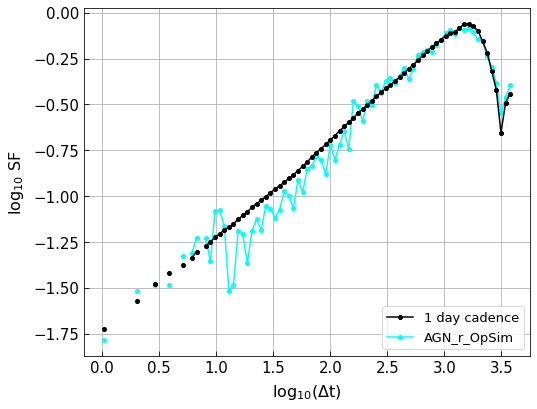

In [18]:
fig = plt.figure(figsize=(8,6.4))

ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$\log_{10}(\Delta \mathrm{t})$', fontsize = 16, labelpad=7)
ax1.set_ylabel(r'$\log_{10} \ \mathrm{SF}$', fontsize = 16, labelpad=7)

color=iter(plt.cm.cool(np.linspace(0,1,3)))
for t, y, l in zip(ts, ys, labels):
    s, edge = functions.sf(t, y)
    if l=="1 day cadence":
        ax1.plot(np.log10(edge[:-1]+np.diff(edge)/2), np.log10(np.sqrt(s)), 'ko-',linewidth=1.5, markersize=4,label=l, zorder=3)
    else:
        c=next(color)
        ax1.plot(np.log10(edge[:-1]+np.diff(edge)/2), np.log10(np.sqrt(s)), c=c, linewidth=1.5, marker='o', markersize=4, label=l)
        

ax1.tick_params(axis='both', which='major', labelsize=15, direction='in', length = 5, pad = 5)
ax1.legend(fontsize=13, loc='lower right')
ax1.grid(True)

### Using it all together for an arbitrary number of OpSim realizations

We will load example OpSim realizations in r, g and u filters for a fixed area in the sky.

In [19]:
mjd1=np.loadtxt('agn_dat/agn_g_ra_0.0_de_-30.0.dat')
mjd1=np.sort(mjd1)

mjd2=np.loadtxt('agn_dat/agn_r_ra_0.0_de_-30.0.dat')
mjd2=np.sort(mjd2)

mjd3=np.loadtxt('agn_dat/agn_u_ra_0.0_de_-30.0.dat')
mjd3=np.sort(mjd3)

opsims = [mjd1, mjd2, mjd3]
labels = ['AGN_g', 'AGN_r', 'AGN_u']
long = 3650
deltatc= 1

Now, we can use our convenient function `LC_SF_viz()` to get all the light curves, as well as their structure functions in one line of code.

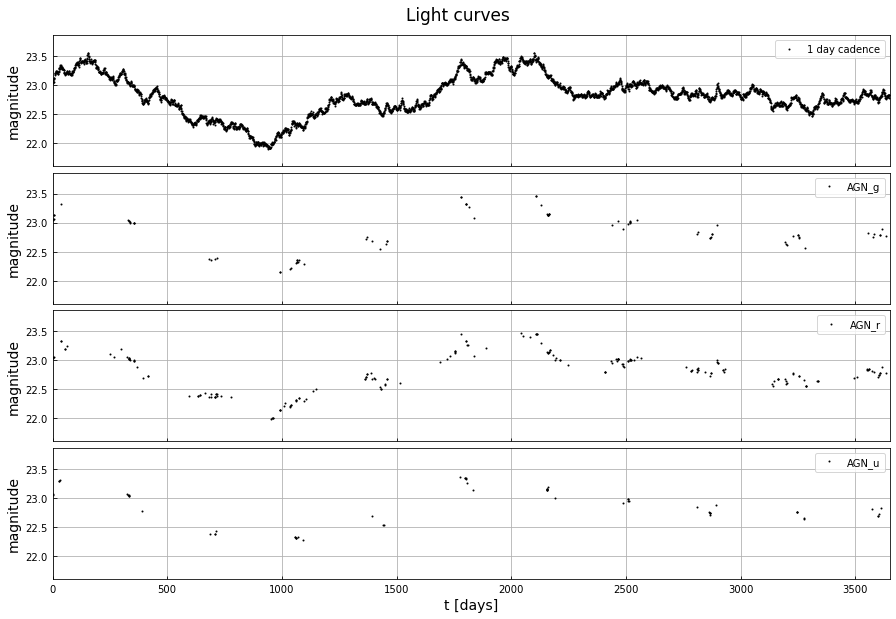

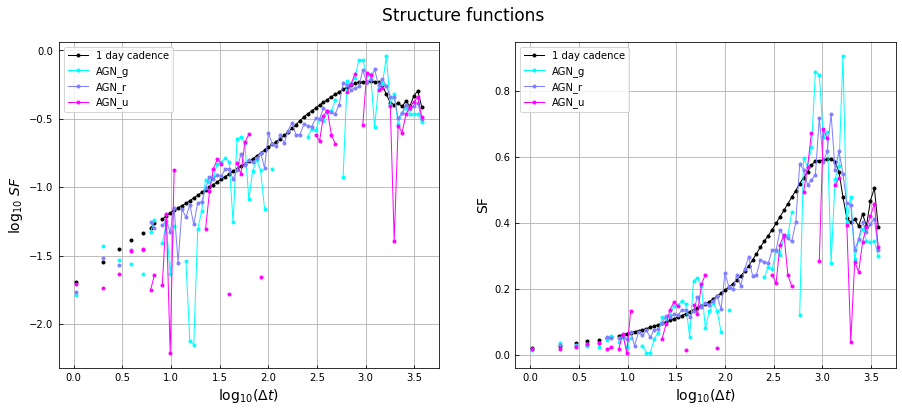

In [20]:
np.random.seed(0)
functions.LC_SF_viz(long, deltatc, opsims, labels)